,Statistic,Value
0,Mean,1657.337196
1,Median,1592.400000
2,Variance,396604.722134
3,Standard Deviation,629.765609


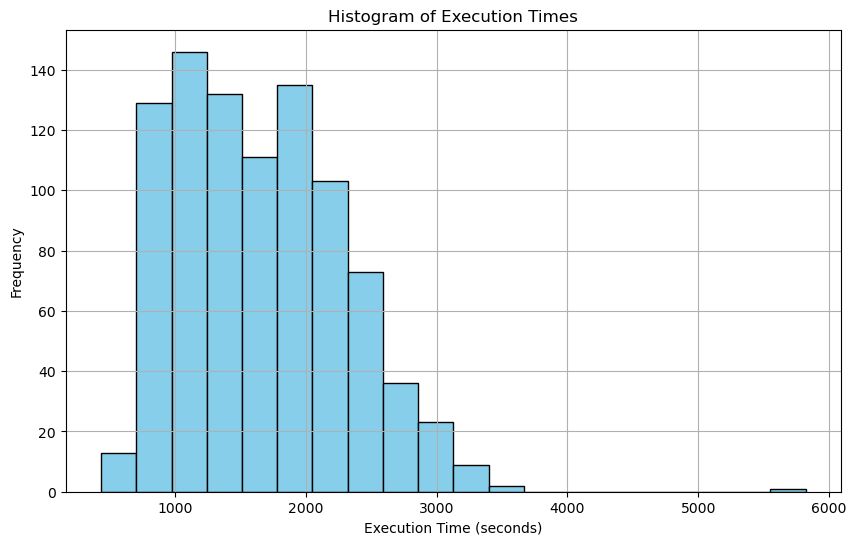

In [1]:
import glob
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Image, Spacer, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors

from IPython.display import display, HTML

# Define the folder path and pattern
folder_path = '/Users/karan/MTData/hpc_scripts'
file_pattern = 'slurm-*.out'

# Initialize an array to store execution times
execution_times = []

# Use glob to find files matching the pattern
for file_path in glob.glob(f'{folder_path}/{file_pattern}'):
    with open(file_path, 'r') as file:
        for line in file:
            match = re.search(r'took (\d+\.\d+) seconds', line)
            if match:
                execution_times.append(float(match.group(1)))

# Convert the list to a numpy array
execution_times = np.array(execution_times)

# Calculate statistics
mean_time = np.mean(execution_times)
median_time = np.median(execution_times)
variance_time = np.var(execution_times)
std_dev_time = np.std(execution_times)

# Create a DataFrame to store statistics
stats_df = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Variance', 'Standard Deviation'],
    'Value': [mean_time, median_time, variance_time, std_dev_time]
})

# Display the DataFrame in Jupyter Notebook
display(HTML(stats_df.to_html()))

# Plot the histogram and save it as an image
plt.figure(figsize=(10, 6))
plt.hist(execution_times, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Execution Times')
plt.xlabel('Execution Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('execution_times_histogram.png')
plt.show()